**Load the data from csv file**

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
from scripts.load_data import *
from scripts.preprocess import *
from scripts.predict_sarima import *
from scripts.helper import *
from scripts.postprocess import *

In [ ]:
data_individual, data_cumulative, data_student_numbers, data_latest, data_distances, weighted_ensemble_data = load_data()

In [2]:
preprocessed_data_individual = read_and_preprocess(data_individual, data_distances, FilterStudentYear.FIRST_YEARS)

**Raw data analysis**

In [3]:
print("Shape of data_individual: ", data_individual.shape)
print("Shape of data_cumulative: ", data_cumulative.shape)
print("Shape of data_student_numbers: ", data_student_numbers.shape)
print("Shape of data_latest: ", data_latest.shape)
print("Shape of data_distances: ", data_distances.shape)

Shape of data_individual:  (472536, 30)
Shape of data_cumulative:  (178567, 14)
Shape of data_student_numbers:  (2425, 4)
Shape of data_latest:  (164784, 17)
Shape of data_distances:  (2438, 2)


In [4]:
print("Features of data_individual:", data_individual.columns)
print("Features of data_cumulative:", data_cumulative.columns)
print("Features of data_student_numbers:", data_student_numbers.columns)
print("Features of data_latest:", data_latest.columns)
print("Features of data_distances:", data_distances.columns)

Features of data_individual: Index(['Sleutel', 'Datum Verzoek Inschr', 'Ingangsdatum', 'Collegejaar',
       'Datum intrekking vooraanmelding', 'Inschrijfstatus', 'Faculteit',
       'Examentype', 'Croho', 'Croho groepeernaam', 'Opleiding',
       'Hoofdopleiding', 'Eerstejaars croho jaar',
       'Is eerstejaars croho opleiding', 'Is hogerejaars', 'BBC ontvangen',
       'Type vooropleiding', 'Nationaliteit', 'EER', 'Geslacht',
       'Geverifieerd adres postcode', 'Geverifieerd adres plaats',
       'Geverifieerd adres land', 'Studieadres postcode', 'Studieadres land',
       'School code eerste vooropleiding', 'School eerste vooropleiding',
       'Plaats code eerste vooropleiding', 'Land code eerste vooropleiding',
       'Aantal studenten'],
      dtype='object')
Features of data_cumulative: Index(['Korte naam instelling', 'Collegejaar', 'Weeknummer rapportage',
       'Weeknummer', 'Faculteit', 'Type hoger onderwijs', 'Groepeernaam Croho',
       'Naam Croho opleiding Nederlands'

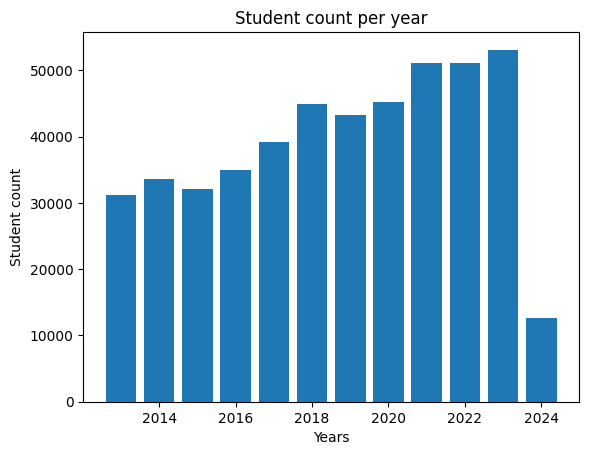

In [5]:
def student_count_years(data):
    year_list = data['Collegejaar'].unique()
    year_list.sort()

    year_counts = data['Collegejaar'].value_counts().sort_index()
    # print(year_counts)

    plt.bar(year_list, year_counts)

    plt.xlabel("Years")
    plt.ylabel("Student count")
    plt.title("Student count per year")

    plt.show()

student_count_years(data_individual)

In [6]:
print(data_individual["Inschrijfstatus"].value_counts())

Inschrijfstatus
Ingeschreven                235344
Geannuleerd                 178693
Uitgeschreven                47620
Verzoek tot inschrijving     10733
Studie gestaakt                143
Aanmelding vervolgen             3
Name: count, dtype: int64


**Preprocessed data analysis**

In [7]:
print("Shape of preproccesed data: ", preprocessed_data_individual.shape)
print("Features of preproccesed data:", preprocessed_data_individual.columns)

Shape of preproccesed data:  (221394, 28)
Features of preproccesed data: Index(['Datum Verzoek Inschr', 'Collegejaar',
       'Datum intrekking vooraanmelding', 'Inschrijfstatus', 'Faculteit',
       'Examentype', 'Croho groepeernaam', 'Opleiding', 'Hoofdopleiding',
       'Type vooropleiding', 'Nationaliteit', 'EER', 'Geslacht',
       'Geverifieerd adres postcode', 'Geverifieerd adres plaats',
       'Geverifieerd adres land', 'Studieadres postcode', 'Studieadres land',
       'School code eerste vooropleiding', 'School eerste vooropleiding',
       'Plaats code eerste vooropleiding', 'Land code eerste vooropleiding',
       'Sleutel_count', 'Weeknummer', 'Herkomst', 'is_numerus_fixus',
       'Afstand', 'Deadlineweek'],
      dtype='object')


In [8]:
def feature_type(data):
    for label, sub_data in data.items():
        print(label)
        index = min(len(sub_data), 20)
        print(sub_data.unique()[:index])
        print(type(sub_data.unique()[0]))
        print()

feature_type(preprocessed_data_individual)

Datum Verzoek Inschr
['18-06-22' '13-05-14' '04-03-14' '28-04-14' '04-08-15' '12-07-13'
 '02-08-16' '31-08-14' '14-07-15' '16-06-13' '05-03-14' '21-07-15'
 '11-08-14' '06-10-16' '16-10-16' '20-10-16' '22-10-16' '25-10-16'
 '28-10-16' '30-01-20']
<class 'str'>

Collegejaar
[2022 2014 2015 2013 2016 2017 2020 2021 2018 2019 2023 2024]
<class 'numpy.int64'>

Datum intrekking vooraanmelding
[nan 10. 46. 40. 16. 36. 37. 19.  7. 17.  5.  3. 31. 23. 26. 24.  2. 33.
 35. 27.]
<class 'numpy.float64'>

Inschrijfstatus
['Ingeschreven' 'Geannuleerd' 'Verzoek tot inschrijving' 'Uitgeschreven'
 'Studie gestaakt' 'Aanmelding vervolgen']
<class 'str'>

Faculteit
['FSW' 'FdM' 'FdL' 'FdR' 'FMW' 'FNWI' 'FFTR' 'RDA']
<class 'str'>

Examentype
['Master' 'Bachelor']
<class 'str'>

Croho groepeernaam
['M Pedagogische Wetenschappen' 'M Psychologie' 'M Political Science'
 'M Taalwetenschappen' 'M Business Administration' 'M Nederlands Recht'
 'M Onderwijswetenschappen' 'M Artificial Intelligence' 'M Fiscaal Re

In [9]:
print(preprocessed_data_individual["Inschrijfstatus"].value_counts())

Inschrijfstatus
Geannuleerd                 131867
Ingeschreven                 64686
Uitgeschreven                15458
Verzoek tot inschrijving      9366
Studie gestaakt                 16
Aanmelding vervolgen             1
Name: count, dtype: int64


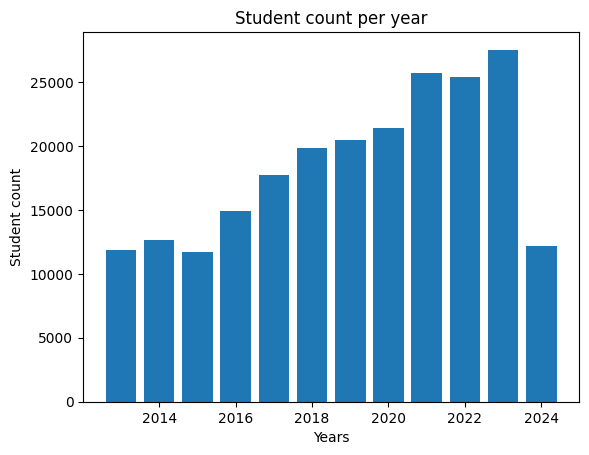

In [10]:
student_count_years(preprocessed_data_individual)

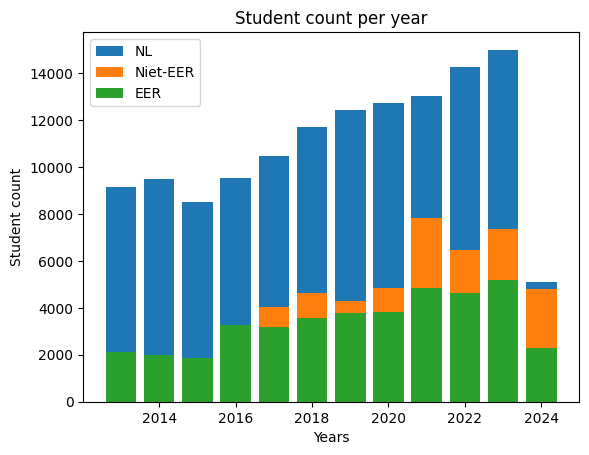

In [11]:
def student_count_years_filter_EER(data):
    year_list = data['Collegejaar'].unique()
    year_list.sort()

    herkomst_options = preprocessed_data_individual["Herkomst"].unique()

    year_counts = {}
    for option in herkomst_options:
        data = preprocessed_data_individual[preprocessed_data_individual["Herkomst"] == option]
        year_counts[option] = data['Collegejaar'].value_counts().sort_index()

    for herkomst, year_count in year_counts.items():
        plt.bar(year_list, year_count, label=herkomst)

    # plt.bar(year_list, year_counts)

    plt.xlabel("Years")
    plt.ylabel("Student count")
    plt.title("Student count per year")
    plt.legend()

    plt.show()

student_count_years_filter_EER(preprocessed_data_individual)

In [13]:
data_cumulative = vooraanmeldingen_joinen(data_cumulative)

preprocessed_data_individual = preprocessed_data_individual.merge(data_cumulative, on=['Croho groepeernaam', 'Collegejaar', 'Faculteit', 'Examentype', 'Weeknummer', 'Herkomst'], how='left')

In [15]:
print(preprocessed_data_individual.columns)

Index(['Datum Verzoek Inschr', 'Collegejaar',
       'Datum intrekking vooraanmelding', 'Inschrijfstatus', 'Faculteit',
       'Examentype', 'Croho groepeernaam', 'Opleiding', 'Hoofdopleiding',
       'Type vooropleiding', 'Nationaliteit', 'EER', 'Geslacht',
       'Geverifieerd adres postcode', 'Geverifieerd adres plaats',
       'Geverifieerd adres land', 'Studieadres postcode', 'Studieadres land',
       'School code eerste vooropleiding', 'School eerste vooropleiding',
       'Plaats code eerste vooropleiding', 'Land code eerste vooropleiding',
       'Sleutel_count', 'Weeknummer', 'Herkomst', 'is_numerus_fixus',
       'Afstand', 'Deadlineweek', 'Gewogen vooraanmelders',
       'Ongwogen vooraanmelders', 'Aantal aanmelders met 1 aanmelding',
       'Inschrijvingen'],
      dtype='object')


In [17]:
max_year = preprocessed_data_individual.Collegejaar.max()
year = 2024
week = 4

max_week = get_max_week(preprocessed_data_individual[preprocessed_data_individual.Collegejaar == year].Weeknummer)

prediction_df = pd.DataFrame(columns=['Collegejaar', 'Faculteit', 'Examentype', 'Herkomst', 'Croho groepeernaam', 'Weeknummer', 'SARIMA'])

predicties = predict_preapplication(preprocessed_data_individual, year, max_year, week)

print(predicties)

[0.00649714 0.69507772 0.39425752 ... 0.00477511 0.71125001 0.20452623]


In [36]:
data = preprocessed_data_individual

data.loc[(data.Collegejaar == year) & (data.Weeknummer.isin(get_weeks_list(week))), 'Inschrijvingen_predictie'] = predicties
print(data.columns)

data = transform(data, year, max_week)
print(data.columns)

data_totaal_cumulatief = transform_data(data, targ_col='Cumulative_sum_within_year')
print(data_totaal_cumulatief.columns)

vooraanmeldingen = data_cumulative
data.Weeknummer = data.Weeknummer.astype(int)
data_exog = data.merge(vooraanmeldingen,
                        on=['Croho groepeernaam', 'Collegejaar', 'Examentype', 'Faculteit', 'Weeknummer', 'Herkomst'], how='left')
print(data_exog.columns)

predict_df = vooraanmeldingen[(vooraanmeldingen.Collegejaar == year) & (vooraanmeldingen.Weeknummer == week)]
print(predict_df.columns)

total = data_student_numbers
vooraanmeldingen = vooraanmeldingen.merge(total, on=['Croho groepeernaam', 'Collegejaar', 'Herkomst'], how = 'left')
vooraanmeldingen['ts'] = vooraanmeldingen['Gewogen vooraanmelders'] + vooraanmeldingen['Inschrijvingen']

vooraanmeldingen = vooraanmeldingen.drop_duplicates()

vooraanmeldingen['Faculteit'] = vooraanmeldingen['Faculteit'].replace({'SOW': 'FSW', 'LET': 'FdL', 'FTR': 'FFTR',
                                                                        'NWI': 'FNWI', 'MAN': 'FdM', 'JUR': 'Fdr',
                                                                        'MED': 'FMW', 'RU': 'FdM'})
print(vooraanmeldingen.columns)

Index(['Datum Verzoek Inschr', 'Collegejaar',
       'Datum intrekking vooraanmelding', 'Inschrijfstatus', 'Faculteit',
       'Examentype', 'Croho groepeernaam', 'Opleiding', 'Hoofdopleiding',
       'Type vooropleiding', 'Nationaliteit', 'EER', 'Geslacht',
       'Geverifieerd adres postcode', 'Geverifieerd adres plaats',
       'Geverifieerd adres land', 'Studieadres postcode', 'Studieadres land',
       'School code eerste vooropleiding', 'School eerste vooropleiding',
       'Plaats code eerste vooropleiding', 'Land code eerste vooropleiding',
       'Sleutel_count', 'Weeknummer', 'Herkomst', 'is_numerus_fixus',
       'Afstand', 'Deadlineweek', 'Gewogen vooraanmelders',
       'Ongwogen vooraanmelders', 'Aantal aanmelders met 1 aanmelding',
       'Inschrijvingen', 'Inschrijvingen_predictie'],
      dtype='object')
Index(['Collegejaar', 'Faculteit', 'Herkomst', 'Examentype',
       'Croho groepeernaam', 'Weeknummer', 'Inschrijfstatus',
       'Inschrijvingen_predictie', 'Cumulati

In [33]:
print("predict_df:", predict_df.columns)
print(predict_df.shape)
print("data_totaal_cumulatief:", data_totaal_cumulatief.columns)
print(data_totaal_cumulatief.shape)
print("data_exog:", data_exog.columns)
print(data_exog.shape)
print("vooraanmeldingen:", vooraanmeldingen.columns)
print(vooraanmeldingen.shape)
print("total:", total.columns)
print(total.shape)

predict_df: Index(['Weeknummer', 'Collegejaar', 'Faculteit', 'Examentype', 'Herkomst',
       'Croho groepeernaam', 'Gewogen vooraanmelders',
       'Ongwogen vooraanmelders', 'Aantal aanmelders met 1 aanmelding',
       'Inschrijvingen'],
      dtype='object')
(211, 10)
data_totaal_cumulatief: Index(['Collegejaar', 'Faculteit', 'Herkomst', 'Examentype',
       'Croho groepeernaam', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38'],
      dtype='object')
(2968, 57)
data_exog: Index(['Collegejaar', 'Faculteit', 'Herkomst', 'Examentype',
       'Croho groepeernaam', 'Weeknummer', 'Inschrijfstatus',
       'Inschrijvingen_predictie', 'Cumulative_sum_within_year',
       'Gewogen vooraanmelders', 'Ongwogen vooraan

In [34]:
print("data_totaal_cumulatief:", data_totaal_cumulatief)

data_totaal_cumulatief:       Collegejaar Faculteit  Herkomst Examentype  \
0            2013      FFTR       EER   Bachelor   
1            2013      FFTR       EER   Bachelor   
2            2013      FFTR       EER   Bachelor   
3            2013      FFTR       EER     Master   
4            2013      FFTR       EER     Master   
...           ...       ...       ...        ...   
2963         2024       RDA        NL     Master   
2964         2024       RDA        NL     Master   
2965         2024       RDA  Niet-EER     Master   
2966         2024       RDA  Niet-EER     Master   
2967         2024       RDA  Niet-EER     Master   

                                   Croho groepeernaam   39   40   41   42  \
0                                         B Filosofie  0.0  0.0  0.0  0.0   
1                              B Religiewetenschappen  0.0  0.0  0.0  0.0   
2                                         B Theologie  0.0  0.0  0.0  0.0   
3                                   M Filos